## Importing packages

In [ ]:
library(here, help, pos = 2, lib.loc = NULL) 
install.packages("cba")
library(cba)
source(here('Modules','modules.R'))
#install_all_packages()
load_library_packages()

## Importing and Cleaning dataset

In [2]:
df_during <- read_excel(path = here('Data','during_dataset.xlsx'))
df_during <- data.frame(df_during)
unique(sapply(df_during, class))
df_during <- df_during[complete.cases(df_during), ]
dim(df_during)
head(df_during)

[1] "numeric"

[1] 1250   44

,PA_barrier_time_family_responsabilities,PA_barrier__tiredness,PA_barrier_places_closed_dangerous,PA_barrier_money,PA_barrier_time_convenience,PA_barrier_hard_work,PA_barrier_no_interest,PA_barrier_none,PA_easiness_outdoor_activities,PA_easiness_professional_guidance,...,soccer,tennis,volleyball,basketball,swimming,surfing,yoga,pilates,fighting,other_sports
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


### Converting dataset types and labels

In [3]:
df_during$PA_intensity[df_during$PA_intensity == 4] <- 0
df_during$PA_duration[df_during$PA_duration == 5] <- 0
df_during$PA_weekly_frequency[df_during$PA_weekly_frequency == 4] <- 0
df_during$PA_practice_during <- ifelse(df_during$PA_practice_during == 0, 1, 0)
df_during$sedentary_time_range_during[df_during$sedentary_time_range_during < 5] <- 0
df_during$sedentary_time_range_during[df_during$sedentary_time_range_during == 5] <- 1
sum(df_during[, "PA_practice_during"])

[1] 900

In [4]:
sports <- c("running","hiking","cycling",
            "muscle_training","soccer","tennis",
            "volleyball","basketball","swimming",
            "surfing","yoga","pilates","fighting","other_sports")

df_during$PA_number <- rowSums(df_during[, sports])

### Separing barriers from dataset

In [5]:
colnames(df_during)
head(df_during)

[1] "PA_barrier_time_family_responsabilities"
 [2] "PA_barrier__tiredness"                  
 [3] "PA_barrier_places_closed_dangerous"     
 [4] "PA_barrier_money"                       
 [5] "PA_barrier_time_convenience"            
 [6] "PA_barrier_hard_work"                   
 [7] "PA_barrier_no_interest"                 
 [8] "PA_barrier_none"                        
 [9] "PA_easiness_outdoor_activities"         
[10] "PA_easiness_professional_guidance"      
[11] "PA_easiness_unguided"                   
[12] "PA_easiness_music"                      
[13] "PA_easiness_collective"                 
[14] "PA_easiness_home_activity"              
[15] "PA_easiness_family_activity"            
[16] "PA_easiness_home_space"                 
[17] "PA_easiness_home_equipament"            
[18] "PA_easiness_others"                     
[19] "PA_weekly_frequency"                    
[20] "PA_intensity"                           
[21] "PA_duration"                            
[22] "PA_practice_during"                     
[23] "sedentary_time_range_during"            
[24] "sex"                                    
[25] "age_range"                              
[26] "martialStatus"                          
[27] "co.resident_range"                      
[28] "rooms_range"                            
[29] "income_range"                           
[30] "scholarity"                             
[31] "running"                                
[32] "hiking"                                 
[33] "cycling"                                
[34] "muscle_training"                        
[35] "soccer"                                 
[36] "tennis"                                 
[37] "volleyball"                             
[38] "basketball"                             
[39] "swimming"                               
[40] "surfing"                                
[41] "yoga"                                   
[42] "pilates"                                
[43] "fighting"                               
[44] "other_sports"                           
[45] "PA_number"

,PA_barrier_time_family_responsabilities,PA_barrier__tiredness,PA_barrier_places_closed_dangerous,PA_barrier_money,PA_barrier_time_convenience,PA_barrier_hard_work,PA_barrier_no_interest,PA_barrier_none,PA_easiness_outdoor_activities,PA_easiness_professional_guidance,...,tennis,volleyball,basketball,swimming,surfing,yoga,pilates,fighting,other_sports,PA_number
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,2
4,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,3
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,2


In [6]:
df_during[1:18] <- lapply(df_during[1:18], as.factor)
df_during_barriers_facilitators <- df_during[, 1:18]
dim(df_during_barriers_facilitators)
head(df_during_barriers_facilitators)

[1] 1250   18

,PA_barrier_time_family_responsabilities,PA_barrier__tiredness,PA_barrier_places_closed_dangerous,PA_barrier_money,PA_barrier_time_convenience,PA_barrier_hard_work,PA_barrier_no_interest,PA_barrier_none,PA_easiness_outdoor_activities,PA_easiness_professional_guidance,PA_easiness_unguided,PA_easiness_music,PA_easiness_collective,PA_easiness_home_activity,PA_easiness_family_activity,PA_easiness_home_space,PA_easiness_home_equipament,PA_easiness_others
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
3,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0
5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0
6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


### Removing Strangers

In [7]:
differ_p <- (   df_during$PA_duration == 0 
                | df_during$PA_intensity == 0 
                | df_during$PA_weekly_frequency == 0
                | df_during$PA_number == 0
            )
strange_p <- df_during$PA_practice_during == 1 & differ_p
df_during <- df_during[!strange_p, ]
df_during_barriers_facilitators <- df_during_barriers_facilitators[!strange_p, ]
table(strange_p)

differ_dp <- ( df_during$PA_duration != 0 
                | df_during$PA_intensity != 0 
                | df_during$PA_weekly_frequency != 0
                | df_during$PA_number != 0
            ) 
strange_dp <- df_during$PA_practice_during == 0 & differ_dp 


table(strange_dp)
df_during <- df_during[!strange_dp, ]
df_during_barriers_facilitators <- df_during_barriers_facilitators[!strange_dp, ]

strange_p
FALSE  TRUE 
 1244     6 

strange_dp
FALSE  TRUE 
 1218    26 

In [8]:
df_during_barriers_facilitators

,PA_barrier_time_family_responsabilities,PA_barrier__tiredness,PA_barrier_places_closed_dangerous,PA_barrier_money,PA_barrier_time_convenience,PA_barrier_hard_work,PA_barrier_no_interest,PA_barrier_none,PA_easiness_outdoor_activities,PA_easiness_professional_guidance,PA_easiness_unguided,PA_easiness_music,PA_easiness_collective,PA_easiness_home_activity,PA_easiness_family_activity,PA_easiness_home_space,PA_easiness_home_equipament,PA_easiness_others
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
3,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0
5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0
6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
8,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0
9,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0,1,1,0
11,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,1,0
12,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0


## Clustering

### Preparing silhuette method

In [9]:
df_matrix <- data.matrix(df_during_barriers_facilitators) - 1
similarity_matrix <- df_matrix %*% t(df_matrix) + ((!df_matrix) + 0) %*% ((!t(df_matrix)) + 0)
dissimilarity_matrix <- ncol(df_during_barriers_facilitators) - similarity_matrix
head(dissimilarity_matrix)

,2,3,4,5,6,8,9,11,12,14,...,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255
2,0,5,2,3,3,6,4,6,2,4,...,4,6,3,7,6,1,7,4,6,2
3,5,0,7,6,6,7,7,7,3,7,...,5,5,8,10,5,4,6,3,5,3
4,2,7,0,3,5,6,4,6,4,4,...,6,6,3,5,8,3,7,6,8,4
5,3,6,3,0,6,5,5,5,3,3,...,5,7,4,4,7,4,6,7,7,5
6,3,6,5,6,0,7,7,7,5,7,...,3,5,4,8,5,2,6,5,7,3
8,6,7,6,5,7,0,8,6,6,4,...,6,6,9,5,8,5,9,6,6,6


### Kmodes - find best k

#### Silhoette 

- Runing for multiple seed


In [10]:
# num_seeds = 20
# max_indexs <- c()
# max_values <- c()
# for(seed in 1:num_seeds){
#     silhouette_scs <- c()
#     for(k in 2:8){
#         sc <- silhouette_values_kmodes(num_clusters=k, df=df_during_barriers_facilitators, diss_matrix=dissimilarity_matrix, iters=200, s=seed)[[1]]

#         silhouette_scs <- append(sc, silhouette_scs)
#     }
#     mvalue <- max(silhouette_scs)
#     max_values <- append(mvalue, max_values)
#     max_indexs <- append(9 - match(max(mvalue), silhouette_scs), max_indexs)
# }
# write.csv(data.frame(k=rev(max_indexs), sc=rev(max_values)),"../Data/silhouette_kmodes.csv", row.names = FALSE)

In [11]:
best_silhouettes <- read.csv('../Data/silhouette_kmodes.csv')
best_silhouettes$seed <- seq.int(nrow(best_silhouettes))
head(best_silhouettes[order(best_silhouettes$sc, decreasing=TRUE), ], 10)

,k,sc,seed
,<int>,<dbl>,<int>
3,6,0.2644189,3
10,8,0.2600685,10
6,8,0.2518427,6
8,5,0.2518038,8
12,8,0.2397568,12
15,8,0.2394924,15
5,6,0.2338669,5
17,8,0.2324523,17
1,7,0.2314253,1


- Evaluating the silhuette coefficient for best seeds

In [12]:
# silhoutte_result <-  silhouette_values(num_clusters=3, df=df_during, diss_matrix=dissimilarity_matrix, iters=200, s=68)
# coef_data <- data.frame(coef=silhoutte_result[[2]], clust=silhoutte_result[[3]]$cluster)
# coef_data <- coef_data[order(coef_data$coef, decreasing=TRUE), ]
# coef_data <- coef_data[order(coef_data$clust, decreasing=TRUE), ]
# coef_data$clust <- as.factor(coef_data$clust )
# coef_data$ID <- seq.int(nrow(coef_data))

# ggplot(data = coef_data, aes(y=coef, x=ID, fill=clust)) + 
#   geom_bar(stat = "identity") + 
#   geom_hline(yintercept=mean(coef_data$coef), linetype="dashed", color = "red") + 
#   coord_flip() + 
#   scale_x_reverse() + 
#   theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

In [13]:
# silhoutte_result <-  silhouette_values(num_clusters=4, df=df_during, diss_matrix=dissimilarity_matrix, iters=200, s=62)
# coef_data <- data.frame(coef=silhoutte_result[[2]], clust=silhoutte_result[[3]]$cluster)
# coef_data <- coef_data[order(coef_data$coef, decreasing=TRUE), ]
# coef_data <- coef_data[order(coef_data$clust, decreasing=TRUE), ]
# coef_data$clust <- as.factor(coef_data$clust )
# coef_data$ID <- seq.int(nrow(coef_data))

# ggplot(data = coef_data, aes(y=coef, x=ID, fill=clust)) + 
#   geom_bar(stat = "identity") + 
#   geom_hline(yintercept=mean(coef_data$coef), linetype="dashed", color = "red") + 
#   coord_flip() + 
#   scale_x_reverse() 

In [14]:
# silhoutte_result <-  silhouette_values(num_clusters=3, df=df_during, diss_matrix=dissimilarity_matrix, iters=200, s=13)
# coef_data <- data.frame(coef=silhoutte_result[[2]], clust=silhoutte_result[[3]]$cluster)
# coef_data <- coef_data[order(coef_data$coef, decreasing=TRUE), ]
# coef_data <- coef_data[order(coef_data$clust, decreasing=TRUE), ]
# coef_data$clust <- as.factor(coef_data$clust )
# coef_data$ID <- seq.int(nrow(coef_data))

# ggplot(data = coef_data, aes(y=coef, x=ID, fill=clust)) + 
#   geom_bar(stat = "identity") + 
#   geom_hline(yintercept=mean(coef_data$coef), linetype="dashed", color = "red") + 
#   coord_flip() + 
#   scale_x_reverse() 

#### Fisher

In [15]:
# num_seeds = 20
# max_indexs <- c()
# max_values <- c()
# for(seed in 1:num_seeds){
#     fishers <- c()
#     for(k in 2:8){
#         fs <- fisher_values_kmodes(k, df_during_barriers_facilitators, 200, seed)[[1]]

#         fishers <- append(fs, fishers)
#     }
#     mvalue <- max(fishers)
#     max_values <- append(mvalue, max_values)
#     max_indexs <- append(9 - match(max(mvalue), fishers), max_indexs)
# }


# write.csv(data.frame(k=rev(max_indexs), fs=rev(max_values)),"../Data/fisher_kmodes.csv", row.names = FALSE)

In [16]:
best_fishers <- read.csv('../Data/fisher_kmodes.csv')
best_fishers$seed <- seq.int(nrow(best_fishers))
head(best_fishers[order(best_fishers$fs, decreasing=TRUE), ], 10)

,k,fs,seed
,<int>,<dbl>,<int>
16,8,2.350265,16
15,7,1.833208,15
14,8,1.783094,14
18,8,1.738625,18
3,8,1.682068,3
6,8,1.680243,6
19,7,1.664403,19
8,6,1.613212,8
13,6,1.603241,13


### Kmedoids - find best k

In [17]:
# source(here('Modules','modules.R'))
# silhouette_scs <- c()
# for(k in 2:8){
#     sc <- silhouette_values_kmedoids(num_clusters=k, df=df_during_barriers_facilitators, diss_matrix=dissimilarity_matrix)[[1]]

#     silhouette_scs <- append(sc, silhouette_scs)
# }

# print(silhouette_scs)
# mvalue <- max(silhouette_scs)
# 9 - match(mvalue, silhouette_scs)


### ROCK

In [18]:
head(df_matrix)

,PA_barrier_time_family_responsabilities,PA_barrier__tiredness,PA_barrier_places_closed_dangerous,PA_barrier_money,PA_barrier_time_convenience,PA_barrier_hard_work,PA_barrier_no_interest,PA_barrier_none,PA_easiness_outdoor_activities,PA_easiness_professional_guidance,PA_easiness_unguided,PA_easiness_music,PA_easiness_collective,PA_easiness_home_activity,PA_easiness_family_activity,PA_easiness_home_space,PA_easiness_home_equipament,PA_easiness_others
2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
3,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0
5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0
6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
8,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0


- proportion of: (only one bit one)/(at least 1 bit on)

In [19]:
dist(df_matrix, method="binary")

             2         3         4         5         6         8         9
3    0.8333333                                                            
4    0.3333333 0.8750000                                                  
5    0.5000000 0.8571429 0.4285714                                        
6    0.6000000 1.0000000 0.7142857 0.8571429                              
8    0.7500000 0.8750000 0.6666667 0.6250000 0.8750000                    
9    0.5000000 0.7777778 0.4444444 0.5555556 0.7777778 0.7272727          
11   0.7500000 0.8750000 0.6666667 0.6250000 0.8750000 0.6666667 0.4444444
12   0.4000000 0.6000000 0.5714286 0.5000000 0.8333333 0.7500000 0.5000000
14   0.5714286 0.8750000 0.5000000 0.4285714 0.8750000 0.5000000 0.4444444
15   1.0000000 0.8000000 1.0000000 1.0000000 1.0000000 0.7142857 0.7777778
16   0.8000000 0.7500000 0.6666667 0.6000000 1.0000000 0.8571429 0.7500000
17   0.8571429 1.0000000 0.5714286 0.7142857 1.0000000 0.7500000 0.8000000
18   1.0000000 1.0000000 

In [20]:
print("Desagree in: ")
print(sum(df_matrix[1, ] != df_matrix[2,]))
print("Has at least one bit on: ")
print(sum(df_matrix[1, ] == 1 | df_matrix[2, ]))
print(sum(df_matrix[1, ] != df_matrix[2,])/sum(df_matrix[1, ] == 1 | df_matrix[2, ]))

[1] "Desagree in: "
[1] 5
[1] "Has at least one bit on: "
[1] 6
[1] 0.8333333


In [21]:
source(here('Modules','modules.R'))
fisher_values_rock(3, 0.5, df_during_barriers_facilitators)[[1]]

Clustering:
computing distances ...
computing links ...
computing clusters ...


[1] 0.04507531

#### Fisher

In [ ]:
# thetas <- linspace(0, 0.5, n = 20)
# max_indexs <- c()
# max_values <- c()
# for(theta in thetas){
#     fishers <- c()
#     for(k in 2:8){
#         fs <- fisher_values_rock(k, theta, df_during_barriers_facilitators)[[1]]

#         fishers <- append(fs, fishers)
#     }
#     mvalue <- max(fishers)
#     max_values <- append(mvalue, max_values)
#     max_indexs <- append(9 - match(max(mvalue), fishers), max_indexs)
# }

# write.csv(data.frame(k=rev(max_indexs), fs=rev(max_values), th=thetas),"../Data/fisher_rock.csv", row.names = FALSE)

In [52]:
best_fishers_rock <- read.csv('../Data/fisher_rock.csv')
head(best_fishers_rock[order(best_fishers_rock$fs, decreasing=TRUE), ], 10)

,k,fs,th
,<int>,<dbl>,<dbl>
3,8,1.1528611,0.05263158
4,7,1.0502981,0.07894737
5,8,1.0104793,0.10526316
2,8,0.9040211,0.02631579
8,8,0.7340106,0.18421053
6,6,0.7272534,0.13157895
7,8,0.7200570,0.15789474
11,8,0.3900946,0.26315789
9,6,0.3888644,0.21052632


#### Silhouette

In [57]:
modefunc <- function(x){
  Mode(as.numeric(x))
}


In [58]:


clusteri = df_during_barriers_facilitators[rockCluster(df_matrix, n=3, theta=0.5)$cl == 1, ]
unname(apply(clusteri, 2, modefunc))


Clustering:
computing distances ...
computing links ...
computing clusters ...


[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0

## Exploring K = 4

In [24]:
 kmodes_seed(df_during_barriers_facilitators, k, max_iter=200, seed=47)$cluster


[1] 1 1 2 4 3 6 6 4 1 4 7 1 4 1 1 6 5 1 1 4 1 1 4 4 1 6 2 1 1 1 3 1 6 1 4 4 7
  [38] 7 1 4 3 4 4 1 6 6 7 1 3 2 1 7 1 1 7 8 1 6 2 4 1 1 1 6 8 6 6 4 6 1 6 4 1 1
  [75] 1 1 1 6 3 6 1 2 1 1 7 1 6 6 1 4 1 8 1 1 1 4 1 1 2 1 4 6 1 4 3 3 6 1 6 2 4
 [112] 5 3 4 1 4 4 4 1 1 4 6 1 4 1 1 3 1 4 4 8 1 2 1 6 7 6 6 8 8 8 3 4 2 6 1 1 4
 [149] 1 2 8 2 1 1 6 3 2 4 1 1 1 7 1 1 4 6 3 4 4 4 8 1 7 2 4 7 1 2 6 2 3 4 6 1 3
 [186] 6 6 2 1 8 3 1 7 2 4 3 4 1 7 2 7 1 6 1 1 1 1 6 1 4 1 5 3 2 4 4 1 1 6 6 1 1
 [223] 4 6 8 1 8 4 6 1 1 1 5 2 7 8 1 1 6 6 8 1 1 2 4 6 6 1 6 5 1 5 4 1 6 3 1 7 8
 [260] 8 6 1 1 6 1 7 7 1 1 4 4 6 8 1 1 6 1 1 8 1 1 4 7 1 6 3 1 4 1 3 8 6 1 2 1 1
 [297] 4 6 1 6 6 1 4 4 8 4 1 7 3 1 7 1 6 1 1 6 6 3 6 6 3 3 3 2 1 1 3 7 3 8 2 6 3
 [334] 4 2 1 2 3 1 3 2 1 1 2 4 3 1 1 1 2 2 7 3 1 7 1 4 1 3 4 7 6 6 2 3 2 1 3 4 1
 [371] 3 1 2 2 4 2 1 2 2 1 1 7 3 8 4 8 1 1 4 2 1 1 2 1 3 3 2 1 1 2 4 6 3 1 3 1 2
 [408] 2 3 3 4 1 4 2 3 7 8 7 2 4 3 4 1 1 1 1 2 6 2 1 2 1 3 4 2 2 2 2 3 7 1 6 3 3
 [445] 3 3 3 4 1 4 3 3 4 4 4 1 6 1 2 4 4 3 2 6 1 4 1 8 6 2 8 8 1 3 1 4 1 3 3 2 6
 [482] 6 2 3 1 1 8 6 1 2 4 4 2 6 2 6 4 6 7 1 1 1 1 6 5 1 6 3 1 1 8 3 4 2 7 6 6 2
 [519] 4 6 6 5 1 1 2 4 3 1 5 1 2 4 4 1 4 1 5 6 3 6 4 4 3 7 1 3 1 4 1 6 1 6 2 1 2
 [556] 6 2 3 1 4 8 3 6 2 3 3 3 8 1 1 1 6 1 2 6 6 2 3 6 2 5 1 1 5 4 3 2 1 1 6 3 3
 [593] 1 4 4 2 1 1 2 1 1 1 1 6 2 4 3 1 3 3 1 7 7 3 1 3 3 4 2 1 2 7 2 2 2 3 8 4 2
 [630] 7 6 3 1 1 1 6 6 6 3 4 4 8 1 1 6 3 2 6 2 1 2 6 3 2 1 6 1 6 2 5 1 2 6 6 1 4
 [667] 3 6 2 1 3 8 2 2 8 2 4 6 6 4 6 1 2 1 3 2 2 2 4 6 2 3 1 6 8 1 3 2 7 3 3 6 1
 [704] 6 4 1 2 4 4 2 3 7 4 4 2 2 2 4 6 3 2 3 1 6 3 1 2 3 6 4 6 1 1 3 7 1 1 1 2 1
 [741] 3 2 2 1 1 2 3 1 5 1 1 2 2 6 1 4 6 3 4 2 1 3 3 7 2 1 1 1 2 6 4 3 3 2 1 6 1
 [778] 6 3 2 5 1 6 3 1 4 1 1 1 7 3 6 1 6 6 6 1 4 1 3 3 4 1 1 1 3 3 3 1 3 1 1 1 6
 [815] 1 5 6 7 1 2 1 2 2 8 1 7 1 2 1 2 2 2 3 6 1 3 7 1 4 2 2 1 4 4 2 3 8 3 3 2 4
 [852] 3 6 7 4 2 3 3 8 1 2 6 3 2 3 1 4 6 4 6 1 8 1 8 7 1 1 3 1 2 1 6 4 1 3 6 4 5
 [889] 3 4 2 1 1 7 5 7 1 1 1 1 3 2 1 2 4 3 3 4 1 3 2 7 3 1 1 2 1 7 1 1 2 2 1 5 3
 [926] 1 1 3 3 4 2 4 1 2 1 2 4 6 3 2 2 4 2 3 2 8 3 2 3 6 3 6 4 8 2 6 4 2 3 4 6 5
 [963] 4 2 6 1 2 1 2 1 7 1 2 1 1 1 2 2 6 2 2 3 2 2 2 3 3 4 2 2 4 1 1 1 3 1 3 3 1
[1000] 6 7 3 1 2 3 4 4 1 4 6 2 1 1 2 6 4 1 1 1 2 1 2 6 1 4 2 3 6 2 1 1 2 2 1 1 2
[1037] 1 3 1 1 3 3 7 6 6 4 1 7 2 7 1 6 5 1 6 1 6 6 3 1 6 4 1 6 1 6 4 2 1 1 6 7 1
[1074] 5 1 2 1 6 6 6 1 2 1 5 4 3 1 1 3 3 4 7 3 1 8 1 1 1 1 3 2 1 2 1 8 6 3 5 3 1
[1111] 1 7 1 1 6 3 1 4 2 1 7 5 1 1 3 1 1 5 3 4 7 6 3 1 1 7 1 7 1 1 2 7 3 2 2 2 3
[1148] 2 4 1 6 6 2 4 1 1 1 6 3 2 1 1 1 1 1 2 6 7 1 6 4 3 4 2 6 2 2 4 1 2 7 1 1 1
[1185] 2 2 3 4 4 1 2 3 3 7 3 1 2 1 2 2 3 6 3 6 2 2 3 7 3 3 2 2 3 1 3 1 1 1

Adding clusters to the dataset

In [25]:
set.seed(1)
k = 4

kmode <- kmodes_seed(df_during_barriers_facilitators, k, max_iter=200, seed=47)

cls <- kmode$cluster[!strange_p]
cls <- cls[!strange_dp]

df_during$cluster <- cls
head(df_during)
colnames(df_during)

,PA_barrier_time_family_responsabilities,PA_barrier__tiredness,PA_barrier_places_closed_dangerous,PA_barrier_money,PA_barrier_time_convenience,PA_barrier_hard_work,PA_barrier_no_interest,PA_barrier_none,PA_easiness_outdoor_activities,PA_easiness_professional_guidance,...,volleyball,basketball,swimming,surfing,yoga,pilates,fighting,other_sports,PA_number,cluster
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2,1
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,2,2
4,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,3,1
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,3
6,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,2,1
8,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,4


[1] "PA_barrier_time_family_responsabilities"
 [2] "PA_barrier__tiredness"                  
 [3] "PA_barrier_places_closed_dangerous"     
 [4] "PA_barrier_money"                       
 [5] "PA_barrier_time_convenience"            
 [6] "PA_barrier_hard_work"                   
 [7] "PA_barrier_no_interest"                 
 [8] "PA_barrier_none"                        
 [9] "PA_easiness_outdoor_activities"         
[10] "PA_easiness_professional_guidance"      
[11] "PA_easiness_unguided"                   
[12] "PA_easiness_music"                      
[13] "PA_easiness_collective"                 
[14] "PA_easiness_home_activity"              
[15] "PA_easiness_family_activity"            
[16] "PA_easiness_home_space"                 
[17] "PA_easiness_home_equipament"            
[18] "PA_easiness_others"                     
[19] "PA_weekly_frequency"                    
[20] "PA_intensity"                           
[21] "PA_duration"                            
[22] "PA_practice_during"                     
[23] "sedentary_time_range_during"            
[24] "sex"                                    
[25] "age_range"                              
[26] "martialStatus"                          
[27] "co.resident_range"                      
[28] "rooms_range"                            
[29] "income_range"                           
[30] "scholarity"                             
[31] "running"                                
[32] "hiking"                                 
[33] "cycling"                                
[34] "muscle_training"                        
[35] "soccer"                                 
[36] "tennis"                                 
[37] "volleyball"                             
[38] "basketball"                             
[39] "swimming"                               
[40] "surfing"                                
[41] "yoga"                                   
[42] "pilates"                                
[43] "fighting"                               
[44] "other_sports"                           
[45] "PA_number"                              
[46] "cluster"

In [26]:
kmode$modes

,PA_barrier_time_family_responsabilities,PA_barrier__tiredness,PA_barrier_places_closed_dangerous,PA_barrier_money,PA_barrier_time_convenience,PA_barrier_hard_work,PA_barrier_no_interest,PA_barrier_none,PA_easiness_outdoor_activities,PA_easiness_professional_guidance,PA_easiness_unguided,PA_easiness_music,PA_easiness_collective,PA_easiness_home_activity,PA_easiness_family_activity,PA_easiness_home_space,PA_easiness_home_equipament,PA_easiness_others
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0


#### Practice of Exercise 

Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."


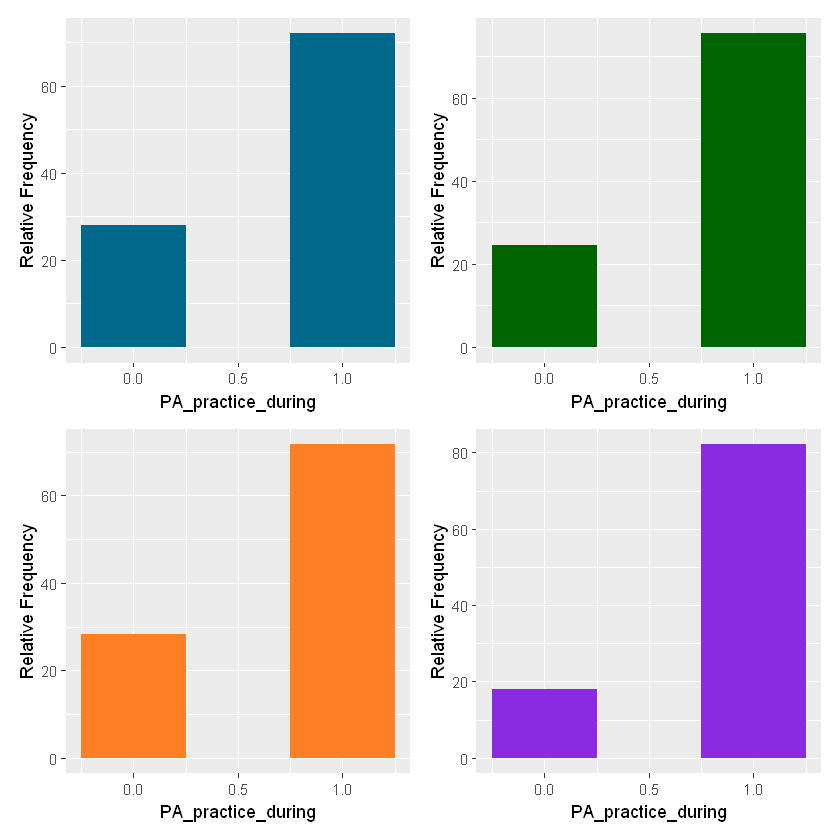

In [27]:
myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray')
for(cl in 1:k){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_practice_during, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 3,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)

#### Sedentary Behavior

Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."


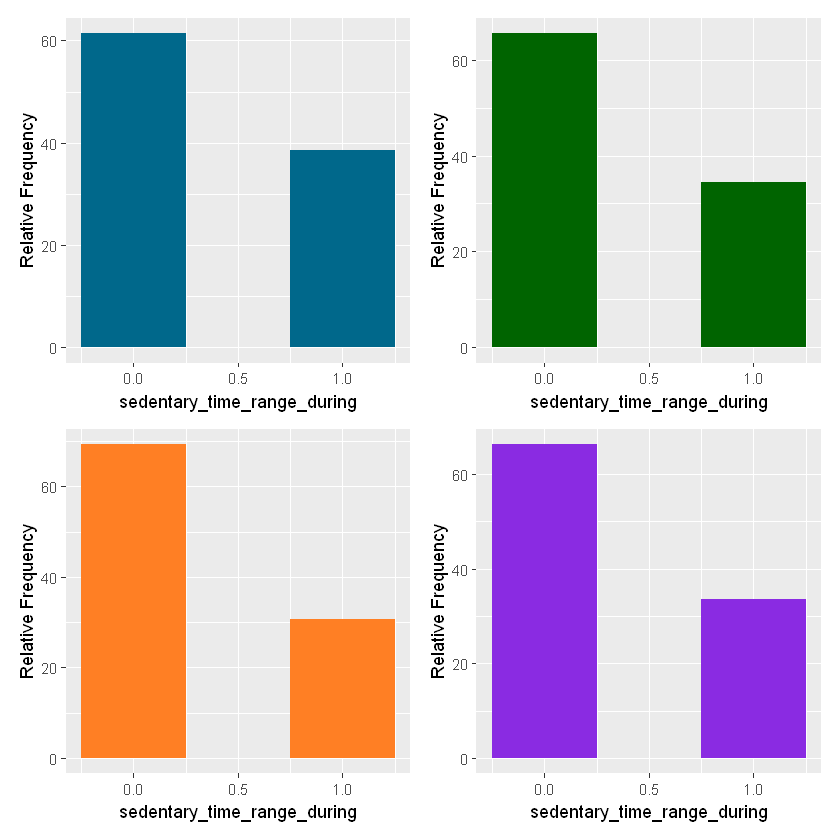

In [28]:
myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray')
for(cl in 1:k){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=sedentary_time_range_during	, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 3,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)

#### Exercise Intensity

Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."


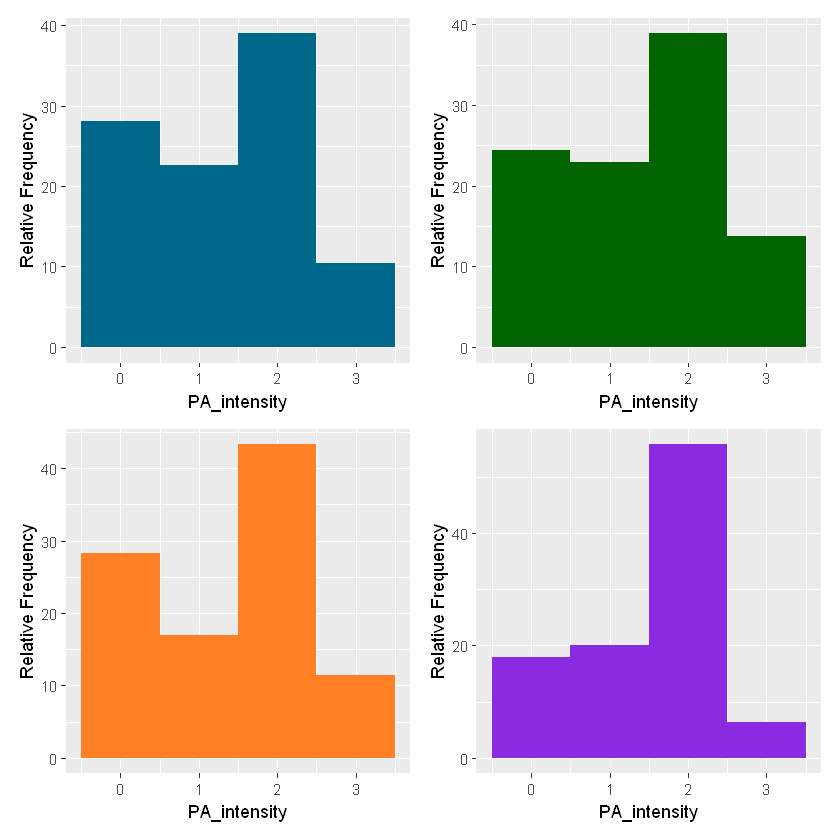

In [29]:
myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray')
for(cl in 1:k){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_intensity, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 4,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)

#### Exercise Duration

Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."


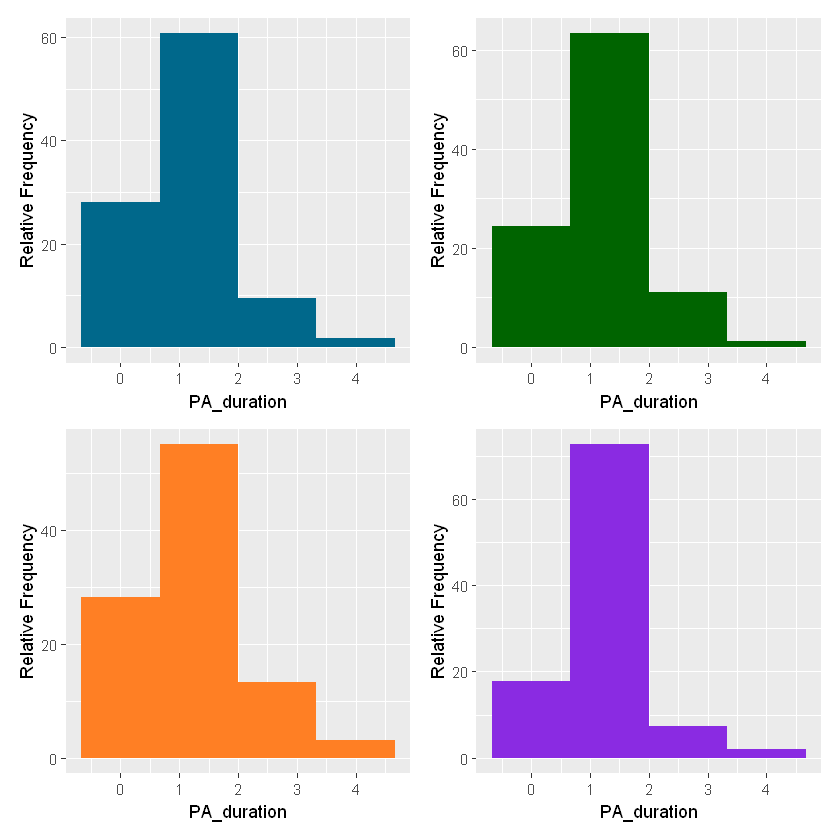

In [30]:
myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray')
for(cl in 1:k){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_duration, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 4,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)

#### Exercise Weekly Frequency

Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."


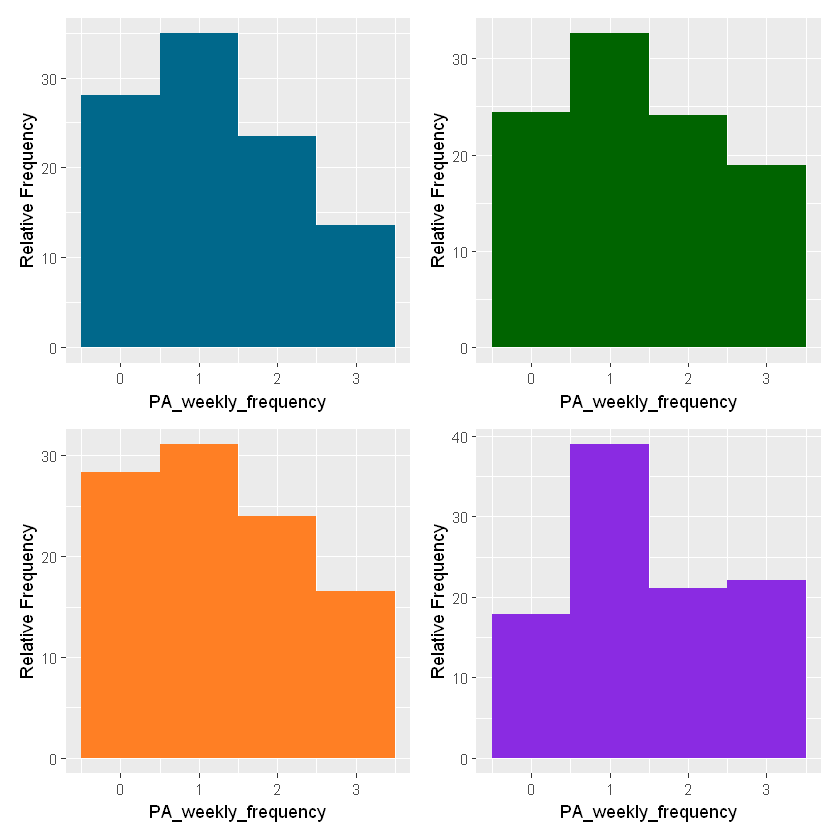

In [31]:

myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray')
for(cl in 1:k){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_weekly_frequency, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 4,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)



#### Number of Exercises

Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."


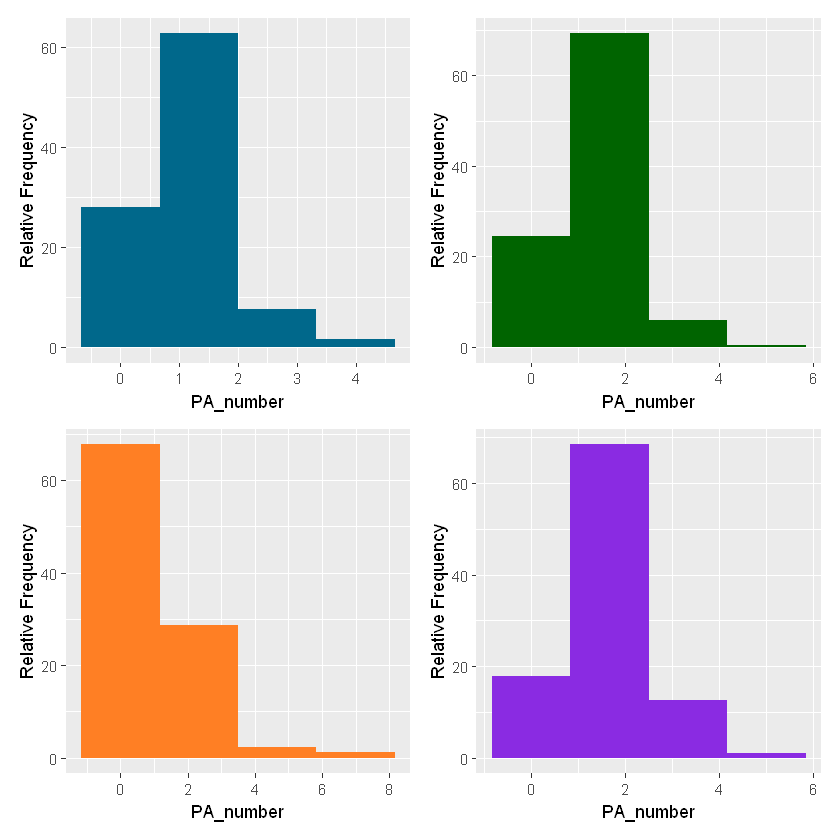

In [32]:
myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray')
for(cl in 1:k){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_number, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 4,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)

#### Income Range

Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."


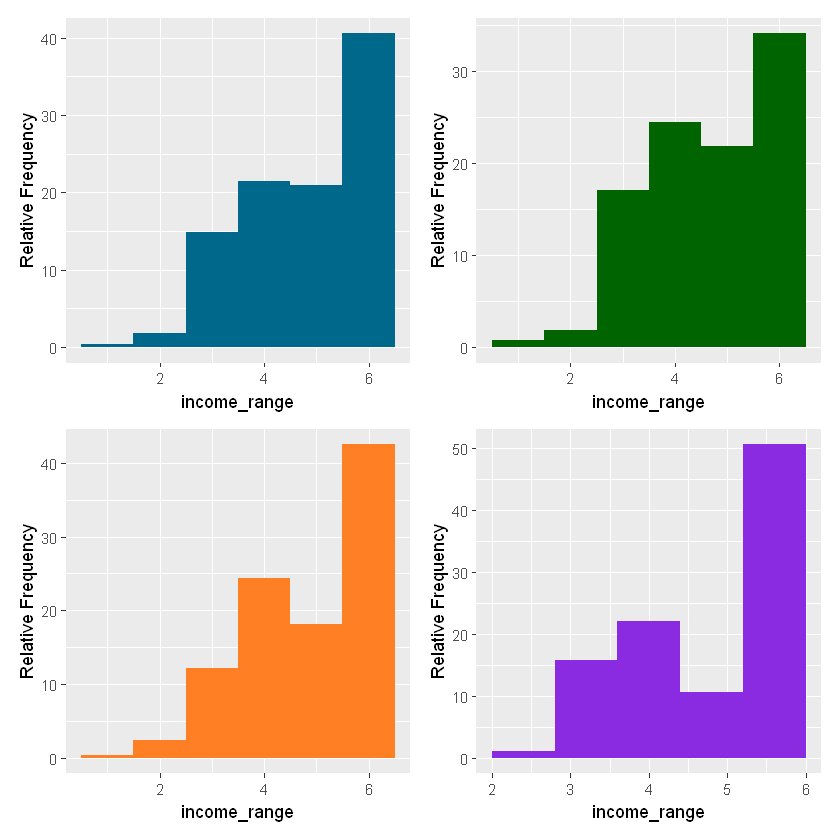

In [33]:

myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray')
for(cl in 1:k){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=income_range, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 6,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)



#### Age Range

Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."


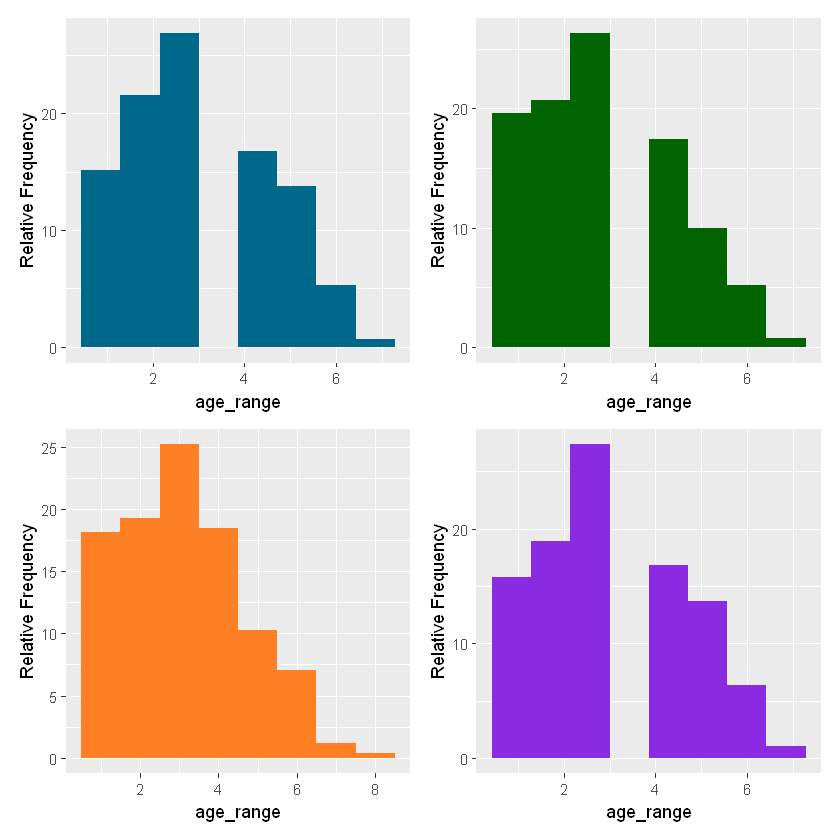

In [34]:

myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray')
for(cl in 1:k){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=age_range, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 8,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)



#### Sex

Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."


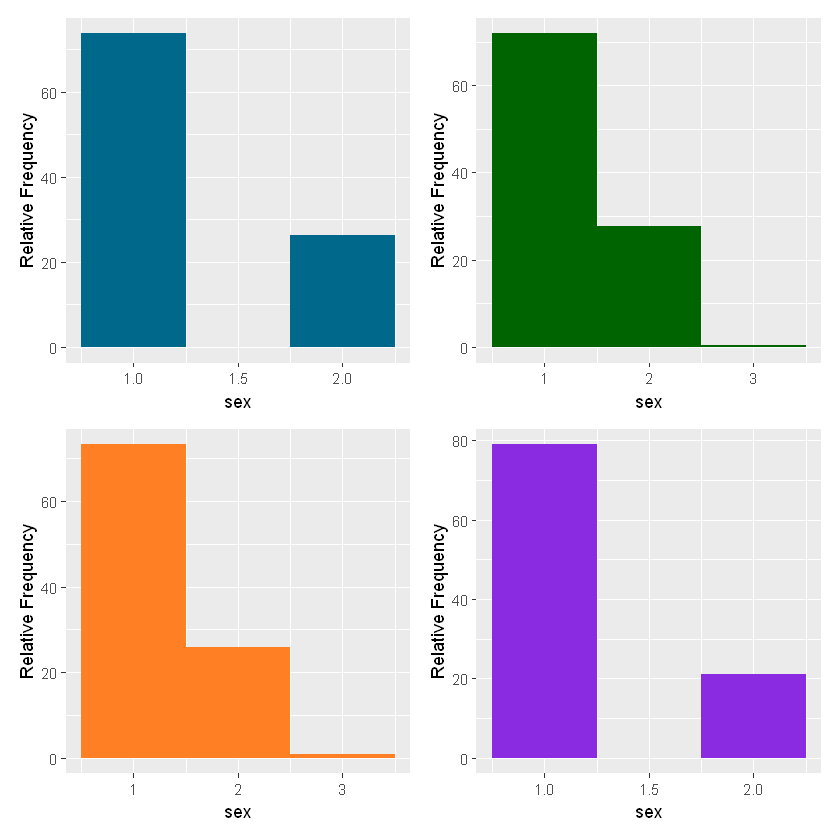

In [35]:

myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray')
for(cl in 1:k){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=sex, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 3,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)



#### Scholarity

Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."


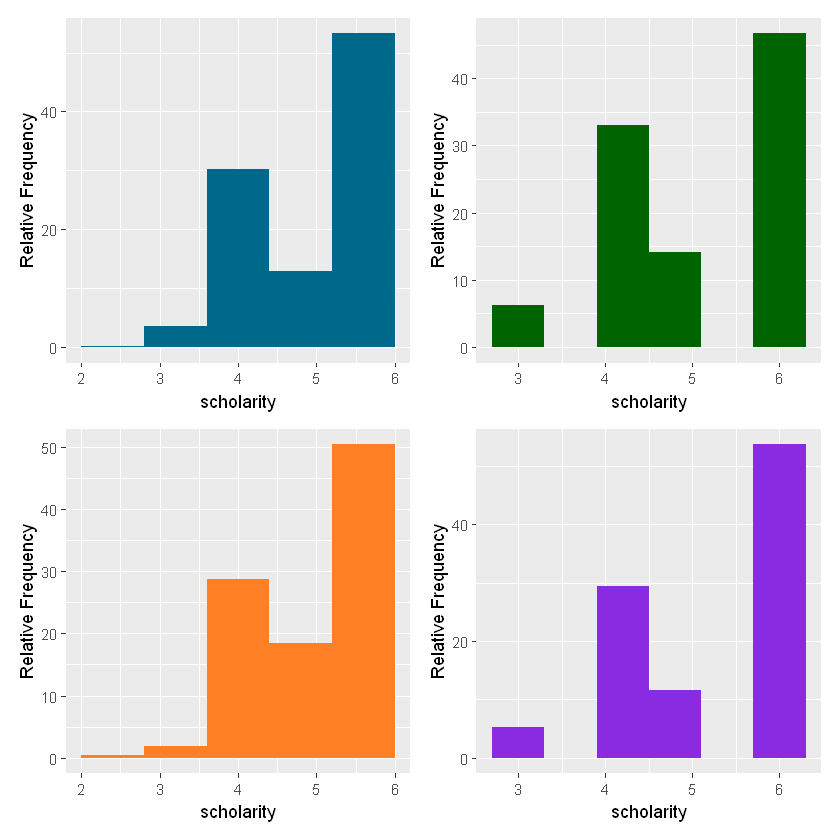

In [36]:

myplots <- list()
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray')
for(cl in 1:k){
  
  plt <- ggplot() + geom_histogram( 
          data=df_during[df_during$cluster == cl,], 
          aes(x=scholarity, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = 6,
          position=position_dodge()
        ) + ylab("Relative Frequency")
  myplots[[cl]] <- plt 
}
wrap_plots(myplots)



#### All charts

In [37]:
df_during[, -c(ncol(df_during))] <- lapply(df_during[, -c(ncol(df_during))], as.factor)
lapply(df_during, levels)[c("volleyball", "basketball")]
df_during <- subset(df_during, select = -c(volleyball, basketball))

$volleyball
[1] "0"

$basketball
[1] "0"

In [38]:
dummy <- dummyVars(" ~ .", data=df_during)
df_during_encoded <- data.frame(predict(dummy, newdata = df_during)) 
colnames(df_during_encoded)

[1] "PA_barrier_time_family_responsabilities.0"
  [2] "PA_barrier_time_family_responsabilities.1"
  [3] "PA_barrier__tiredness.0"                  
  [4] "PA_barrier__tiredness.1"                  
  [5] "PA_barrier_places_closed_dangerous.0"     
  [6] "PA_barrier_places_closed_dangerous.1"     
  [7] "PA_barrier_money.0"                       
  [8] "PA_barrier_money.1"                       
  [9] "PA_barrier_time_convenience.0"            
 [10] "PA_barrier_time_convenience.1"            
 [11] "PA_barrier_hard_work.0"                   
 [12] "PA_barrier_hard_work.1"                   
 [13] "PA_barrier_no_interest.0"                 
 [14] "PA_barrier_no_interest.1"                 
 [15] "PA_barrier_none.0"                        
 [16] "PA_barrier_none.1"                        
 [17] "PA_easiness_outdoor_activities.0"         
 [18] "PA_easiness_outdoor_activities.1"         
 [19] "PA_easiness_professional_guidance.0"      
 [20] "PA_easiness_professional_guidance.1"      
 [21] "PA_easiness_unguided.0"                   
 [22] "PA_easiness_unguided.1"                   
 [23] "PA_easiness_music.0"                      
 [24] "PA_easiness_music.1"                      
 [25] "PA_easiness_collective.0"                 
 [26] "PA_easiness_collective.1"                 
 [27] "PA_easiness_home_activity.0"              
 [28] "PA_easiness_home_activity.1"              
 [29] "PA_easiness_family_activity.0"            
 [30] "PA_easiness_family_activity.1"            
 [31] "PA_easiness_home_space.0"                 
 [32] "PA_easiness_home_space.1"                 
 [33] "PA_easiness_home_equipament.0"            
 [34] "PA_easiness_home_equipament.1"            
 [35] "PA_easiness_others.0"                     
 [36] "PA_easiness_others.1"                     
 [37] "PA_weekly_frequency.0"                    
 [38] "PA_weekly_frequency.1"                    
 [39] "PA_weekly_frequency.2"                    
 [40] "PA_weekly_frequency.3"                    
 [41] "PA_intensity.0"                           
 [42] "PA_intensity.1"                           
 [43] "PA_intensity.2"                           
 [44] "PA_intensity.3"                           
 [45] "PA_duration.0"                            
 [46] "PA_duration.1"                            
 [47] "PA_duration.2"                            
 [48] "PA_duration.3"                            
 [49] "PA_duration.4"                            
 [50] "PA_practice_during.0"                     
 [51] "PA_practice_during.1"                     
 [52] "sedentary_time_range_during.0"            
 [53] "sedentary_time_range_during.1"            
 [54] "sex.1"                                    
 [55] "sex.2"                                    
 [56] "sex.3"                                    
 [57] "age_range.1"                              
 [58] "age_range.2"                              
 [59] "age_range.3"                              
 [60] "age_range.4"                              
 [61] "age_range.5"                              
 [62] "age_range.6"                              
 [63] "age_range.7"                              
 [64] "age_range.8"                              
 [65] "martialStatus.1"                          
 [66] "martialStatus.2"                          
 [67] "martialStatus.3"                          
 [68] "martialStatus.4"                          
 [69] "co.resident_range.1"                      
 [70] "co.resident_range.2"                      
 [71] "co.resident_range.3"                      
 [72] "co.resident_range.4"                      
 [73] "rooms_range.1"                            
 [74] "rooms_range.2"                            
 [75] "rooms_range.3"                            
 [76] "rooms_range.4"                            
 [77] "income_range.1"                           
 [78] "income_range.2"                           
 [79] "income_range.3"                           
 [80] "income_range.4"                           
 [

In [39]:
df_spider <- df_during_encoded %>% group_by(cluster) %>% summarise(
                                    practice = sum(PA_practice_during.1),
                                    sedentary = sum(sedentary_time_range_during.1),
                                    intesity1 = sum(PA_intensity.1),
                                    intesity2 = sum(PA_intensity.2),
                                    intesity3 = sum(PA_intensity.3),
                                    duration1 = sum(PA_duration.1),
                                    duration2 = sum(PA_duration.2),
                                    duration3 = sum(PA_duration.3),
                                    duration4 = sum(PA_duration.4),
                                    frequency1 = sum(PA_weekly_frequency.1),
                                    frequency2 = sum(PA_weekly_frequency.2),
                                    frequency3 = sum(PA_weekly_frequency.3)
                                )
# df_spider['max'] <- apply(df_spider, 1, max)  
# df_spider['min'] <- apply(df_spider, 1, min)  
df_spider <- df_spider[, -c(1)]
df_spider

practice,sedentary,intesity1,intesity2,intesity3,duration1,duration2,duration3,duration4,frequency1,frequency2,frequency3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
408,219,128,221,59,102,242,54,10,198,133,77
204,93,62,105,37,38,133,30,3,88,65,51
182,78,43,110,29,34,106,34,8,79,61,42
78,32,19,53,6,17,52,7,2,37,20,21
22,9,2,15,5,0,13,8,1,8,7,7


In [ ]:
max_min <- data.frame(
    practice = c(400, 0),
    sedentary = c(400, 0),
    intesity1 = c(400, 0),
    intesity2 = c(400, 0),
    intesity3 = c(400, 0),
    duration1 = c(400, 0),
    duration2 = c(400, 0),
    duration3 = c(400, 0),
    duration4 = c(400, 0),
    frequency1 = c(400, 0),
    frequency2 = c(400, 0),
    frequency3 = c(400, 0)
)
rownames(max_min) <- c("Max", "Min")
df_spider <- rbind(max_min, df_spider)
df_spider

,practice,sedentary,intesity1,intesity2,intesity3,duration1,duration2,duration3,duration4,frequency1,frequency2,frequency3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Max,400,400,400,400,400,400,400,400,400,400,400,400
Min,0,0,0,0,0,0,0,0,0,0,0,0
1,408,219,128,221,59,102,242,54,10,198,133,77
2,204,93,62,105,37,38,133,30,3,88,65,51
3,182,78,43,110,29,34,106,34,8,79,61,42
4,78,32,19,53,6,17,52,7,2,37,20,21
5,22,9,2,15,5,0,13,8,1,8,7,7


In [40]:
create_beautiful_radarchart <- function(data, color = "#00AFBB", 
                                        vlabels = colnames(data), vlcex = 0.7,
                                        caxislabels = NULL, title = NULL, ...){
  radarchart(
    data, axistype = 1,
    # Customize the polygon
    pcol = color, pfcol = scales::alpha(color, 0.5), plwd = 2, plty = 1,
    # Customize the grid
    cglcol = "grey", cglty = 1, cglwd = 0.8,
    # Customize the axis
    axislabcol = "grey", 
    # Variable labels
    vlcex = vlcex, vlabels = vlabels,
    caxislabels = caxislabels, title = title, ...
  )
}

In [41]:
df_spider <- df_spider[c("Max", "Min", 3, 1, 2, 4), ]
df_spider

practice,sedentary,intesity1,intesity2,intesity3,duration1,duration2,duration3,duration4,frequency1,frequency2,frequency3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
182,78,43,110,29,34,106,34,8,79,61,42
408,219,128,221,59,102,242,54,10,198,133,77
204,93,62,105,37,38,133,30,3,88,65,51
78,32,19,53,6,17,52,7,2,37,20,21


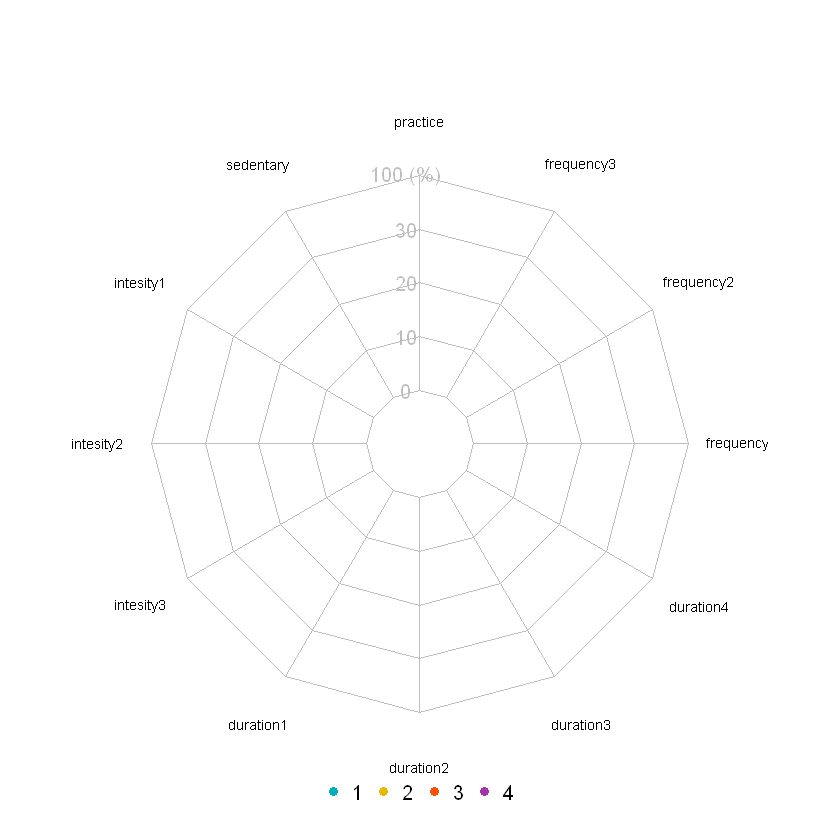

In [42]:

colors <-  c("#00AFBB", "#E7B800", "#FC4E07", '#a432a8')
titles <- c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4")
op <- par(mar = c(1, 3, 3, 3))


create_beautiful_radarchart(
  data = df_spider, 
  caxislabels = c(0, 10, 20, 30),
  color = colors,

)


legend(
  x = "bottom", legend = rownames(df_spider[-c(1,2),]), horiz = TRUE,
  bty = "n", pch = 20 , col =colors,
  text.col = "black", cex = 1, pt.cex = 1.5
)
par(op)